# Face Detection


# Data Preparation And Processing

In [ ]:
import numpy as np
import os
import tensorflow as tf
import cv2
import torch

# Visualize some face image with bounding box

In [ ]:
import kagglehub
# Download dataset
path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")

print("Dataset has been downloaded to:", path)

Dataset has been downloaded to: /kaggle/input/face-detection-dataset


In [ ]:
# thông thường dataset được tải về thôgn qua API kaggle sẽ được lưu ở content nhưng nó lại lưu vào /root/...
# vì vậy coppy tất cả nội dung từ cache về /content
!cp -r /kaggle/input/face-detection-dataset /content/face-detection-dataset

# Kiểm tra thư mục mới sao chép
!ls /content/face-detection-dataset


face-detection-dataset	images	labels	labels2


<Figure size 1200x1000 with 0 Axes>

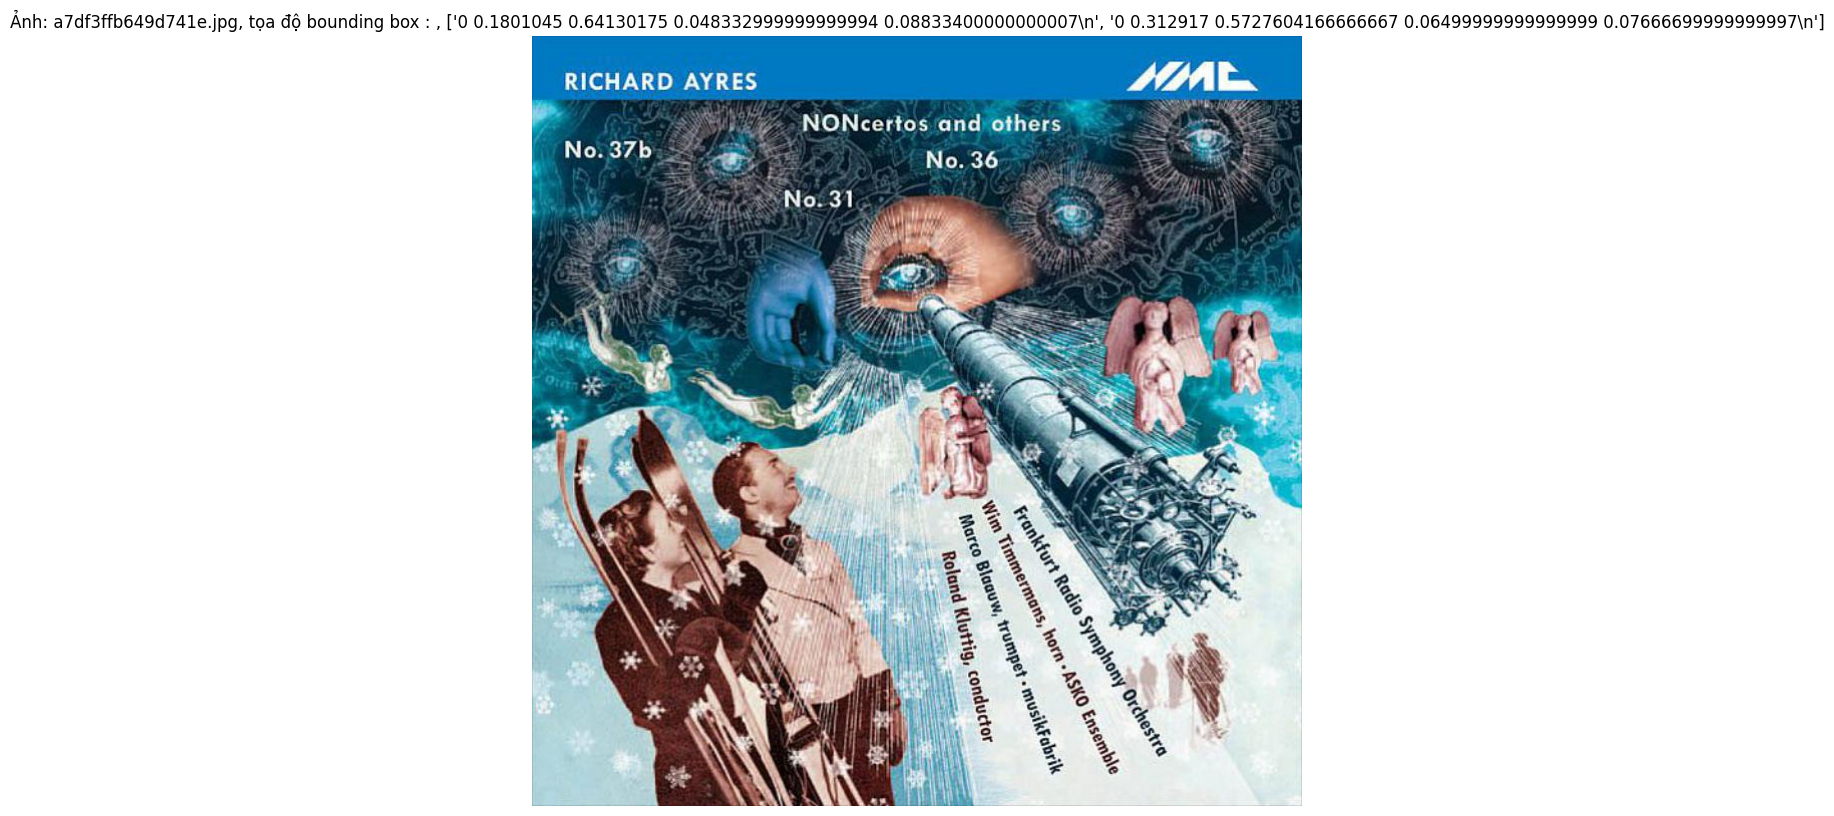

In [ ]:
import matplotlib.pyplot as plt
show_data_image = "/content/face-detection-dataset/images/train"
show_data_bbox  = "/content/face-detection-dataset/labels/train"
# Load ảnh
show_image_list = os.listdir(show_data_image)
show_bbox_list = os.listdir(show_data_bbox)
plt.figure(figsize=(12,10))

# Lọc để đảm bảo ảnh và nhãn tương ứng tồn tại (ví dụ: cùng tên)
image_name = show_image_list[2]
bbox_name = image_name.replace(".jpg", ".txt") # Giả sử ảnh là .jpg và nhãn là .txt

if bbox_name in show_bbox_list:

    show_image_path = os.path.join(show_data_image, image_name)
    show_bbox_path = os.path.join(show_data_bbox, bbox_name)

    # Đọc ảnh bằng OpenCV
    img = cv2.imread(show_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển đổi từ BGR (OpenCV) sang RGB (matplotlib)

    # Đọc nhãn từ file .txt
    with open(show_bbox_path, 'r') as f:
        label_data = f.readlines() # Đọc tất cả các dòng trong bbox

    # Hiển thị ảnh
    plt.figure(figsize=(12,10))
    plt.imshow(img)
    plt.title(f"Ảnh: {image_name}, tọa độ bounding box : , {label_data}" )
    plt.axis('off')

In [ ]:
'''!pip install ultralytics'''

In [ ]:
'''#load yolov8n
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
'''

In [ ]:
def load_paths(image_dir, label_dir, split='train'):
    image_folder = os.path.join(image_dir, split)
    label_folder = os.path.join(label_dir, split)

    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]
    label_paths = [os.path.join(label_folder, f.replace('.jpg', '.txt')) for f in os.listdir(image_folder) if f.endswith('.jpg')]

    return image_paths, label_paths

train_img_paths, train_lbl_paths = load_paths('/content/face-detection-dataset/images',
                                              '/content/face-detection-dataset/labels', split='train')

val_img_paths, val_lbl_paths = load_paths('/content/face-detection-dataset/images',
                                          '/content/face-detection-dataset/labels', split='val')


# Compiling and Training



# Face recognition



## Load dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("duypok/vn-celeb")

print("Path to dataset files:", path)

100%|██████████| 638M/638M [00:17<00:00, 38.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/duypok/vn-celeb/versions/1


In [ ]:
# thông thường dataset được tải về thôgn qua API kaggle sẽ được lưu ở content nhưng nó lại lưu vào /root/...
# vì vậy coppy tất cả nội dung từ cache về /content
!cp -r /root/.cache/kagglehub/datasets/duypok/vn-celeb/versions/1 vn-celeb
# Kiểm tra thư mục mới sao chép
!ls vn-celeb


VN-celeb


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

# Preprocessing

In [ ]:
from ultralytics import YOLO
import os
from PIL import Image
import torch

input_dir = "/content/vn-celeb/VN-celeb"
output_dir = "/content/mobilefacenet-input"
os.makedirs(output_dir, exist_ok=True)

# Load YOLOv8 model đã fine-tuned detect khuôn mặt
model = YOLO("/content/mtcnn.pt")

for person in os.listdir(input_dir):
    person_dir = os.path.join(input_dir, person)
    if not os.path.isdir(person_dir):
        continue

    save_dir = os.path.join(output_dir, person)
    os.makedirs(save_dir, exist_ok=True)

    for img_file in os.listdir(person_dir):
        img_path = os.path.join(person_dir, img_file)

        try:
            # Detect face(s) trong ảnh
            results = model(img_path)

            # Chỉ lấy detection đầu tiên (nếu có)
            if results and results[0].boxes is not None:
                boxes = results[0].boxes.xyxy.cpu().numpy()
                if len(boxes) > 0:
                    # Dùng box đầu tiên (nếu nhiều khuôn mặt thì nên chọn lớn nhất / gần tâm)
                    x1, y1, x2, y2 = boxes[0]
                    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

                    # Load ảnh gốc và crop
                    img = Image.open(img_path).convert("RGB")
                    face = img.crop((x1, y1, x2, y2))
                    face = face.resize((112, 112))

                    # Save
                    save_path = os.path.join(save_dir, img_file)
                    face.save(save_path)
                else:
                    print(f" Không tìm thấy khuôn mặt: {img_path}")
            else:
                print(f"YOLO không trả về box: {img_path}")

        except Exception as e:
            print(f" Lỗi xử lý {img_path}: {e}")

print(" Đã detect, crop và resize khuôn mặt với YOLO.")


Streaming output truncated to the last 5000 lines.
Speed: 1.1ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /content/vn-celeb/VN-celeb/883/6.png: 320x320 1 face, 8.6ms
Speed: 1.0ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /content/vn-celeb/VN-celeb/883/5.png: 320x320 1 face, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /content/vn-celeb/VN-celeb/883/9.png: 320x320 1 face, 8.4ms
Speed: 1.1ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /content/vn-celeb/VN-celeb/883/13.png: 320x320 1 face, 8.7ms
Speed: 1.1ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /content/vn-celeb/VN-celeb/883/0.png: 320x320 2 faces, 8.3ms
Speed: 1.1ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /cont

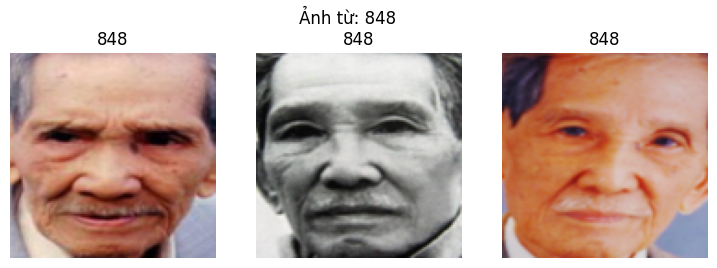

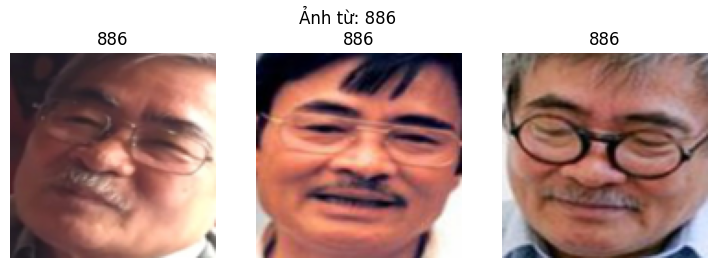

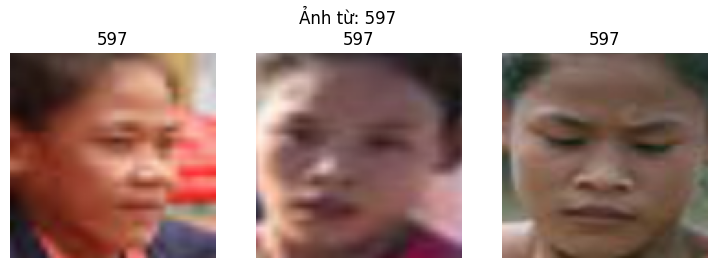

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

# Đường dẫn chứa ảnh đã xử lý
processed_dir = "/content/mobilefacenet-input"

# Lấy ngẫu nhiên một số thư mục người
persons = os.listdir(processed_dir)
random.shuffle(persons)
selected_persons = persons[:3]

for person in selected_persons:
    person_dir = os.path.join(processed_dir, person)
    image_files = os.listdir(person_dir)
    if not image_files:
        continue
    random.shuffle(image_files)
    selected_images = image_files[:3]  # Lấy 3 ảnh mỗi người

    plt.figure(figsize=(9, 3))
    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(person_dir, img_file)
        img = Image.open(img_path)

        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{person}")
    plt.suptitle(f"Ảnh từ: {person}")
    plt.show()


# Architecture MobileFaceNet

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import Subset, DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision import datasets

# Augmentation
train_transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

val_transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

for root, dirs, _ in os.walk('/content/mobilefacenet-input'):
    for d in dirs:
        if d == ".ipynb_checkpoints":
            shutil.rmtree(os.path.join(root, d), ignore_errors=True)

dataset = datasets.ImageFolder(root='/content/mobilefacenet-input')

# lọc các lớp <= 2 ảnh
label_counts = {}
for _, label in dataset.samples:
    label_counts[label] = label_counts.get(label, 0) + 1

valid_indices = [i for i, (_, label) in enumerate(dataset.samples) if label_counts[label] >= 2]
filtered_dataset = Subset(dataset, valid_indices)

targets = np.array([dataset.samples[i][1] for i in valid_indices])

# Stratified Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(splitter.split(np.zeros(len(targets)), targets))

# Custom wrapper để gán transform
class TransformedSubset(Dataset):
    def __init__(self, subset, transform):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        img, label = self.subset[index]
        img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.subset)

train_dataset = TransformedSubset(Subset(filtered_dataset, train_idx), train_transform)
val_dataset   = TransformedSubset(Subset(filtered_dataset, val_idx), val_transform)

# Data loader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0)

used_labels = set(targets[train_idx]) | set(targets[val_idx])
print(f" Tổng ảnh train: {len(train_dataset)} | val: {len(val_dataset)}")
print(f" Số lớp sau lọc: {len(used_labels)}")

In [ ]:
from collections import namedtuple
import math
import torch
import torch.nn as nn
from torch.nn import Linear, Conv2d, BatchNorm1d, BatchNorm2d, PReLU, ReLU, Dropout, MaxPool2d, AdaptiveAvgPool2d, Sequential, Module, Parameter
import torch.nn.functional as F


##################################  Original Arcface Model #############################################################

class Flatten(Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

def l2_norm(input,axis=1):
    norm = torch.norm(input,2,axis,True)
    output = torch.div(input, norm)
    return output

class SEModule(Module):
    def __init__(self, channels, reduction):
        super(SEModule, self).__init__()
        self.avg_pool = AdaptiveAvgPool2d(1)
        self.fc1 = Conv2d(
            channels, channels // reduction, kernel_size=1, padding=0 ,bias=False)
        self.relu = ReLU(inplace=True)
        self.fc2 = Conv2d(
            channels // reduction, channels, kernel_size=1, padding=0 ,bias=False)
        self.sigmoid = Sigmoid()

    def forward(self, x):
        module_input = x
        x = self.avg_pool(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return module_input * x

class bottleneck_IR(Module):
    def __init__(self, in_channel, depth, stride):
        super(bottleneck_IR, self).__init__()
        if in_channel == depth:
            self.shortcut_layer = MaxPool2d(1, stride)
        else:
            self.shortcut_layer = Sequential(
                Conv2d(in_channel, depth, (1, 1), stride ,bias=False), BatchNorm2d(depth))
        self.res_layer = Sequential(
            BatchNorm2d(in_channel),
            Conv2d(in_channel, depth, (3, 3), (1, 1), 1 ,bias=False), PReLU(depth),
            Conv2d(depth, depth, (3, 3), stride, 1 ,bias=False), BatchNorm2d(depth))

    def forward(self, x):
        shortcut = self.shortcut_layer(x)
        res = self.res_layer(x)
        return res + shortcut

class bottleneck_IR_SE(Module):
    def __init__(self, in_channel, depth, stride):
        super(bottleneck_IR_SE, self).__init__()
        if in_channel == depth:
            self.shortcut_layer = MaxPool2d(1, stride)
        else:
            self.shortcut_layer = Sequential(
                Conv2d(in_channel, depth, (1, 1), stride ,bias=False),
                BatchNorm2d(depth))
        self.res_layer = Sequential(
            BatchNorm2d(in_channel),
            Conv2d(in_channel, depth, (3,3), (1,1),1 ,bias=False),
            PReLU(depth),
            Conv2d(depth, depth, (3,3), stride, 1 ,bias=False),
            BatchNorm2d(depth),
            SEModule(depth,16)
            )
    def forward(self,x):
        shortcut = self.shortcut_layer(x)
        res = self.res_layer(x)
        return res + shortcut

class Bottleneck(namedtuple('Block', ['in_channel', 'depth', 'stride'])):
    '''A named tuple describing a ResNet block.'''

def get_block(in_channel, depth, num_units, stride = 2):
  return [Bottleneck(in_channel, depth, stride)] + [Bottleneck(depth, depth, 1) for i in range(num_units-1)]

def get_blocks(num_layers):
    if num_layers == 50:
        blocks = [
            get_block(in_channel=64, depth=64, num_units = 3),
            get_block(in_channel=64, depth=128, num_units=4),
            get_block(in_channel=128, depth=256, num_units=14),
            get_block(in_channel=256, depth=512, num_units=3)
        ]
    elif num_layers == 100:
        blocks = [
            get_block(in_channel=64, depth=64, num_units=3),
            get_block(in_channel=64, depth=128, num_units=13),
            get_block(in_channel=128, depth=256, num_units=30),
            get_block(in_channel=256, depth=512, num_units=3)
        ]
    elif num_layers == 152:
        blocks = [
            get_block(in_channel=64, depth=64, num_units=3),
            get_block(in_channel=64, depth=128, num_units=8),
            get_block(in_channel=128, depth=256, num_units=36),
            get_block(in_channel=256, depth=512, num_units=3)
        ]
    return blocks

class Backbone(Module):
    def __init__(self, num_layers, drop_ratio, mode='ir'):
        super(Backbone, self).__init__()
        assert num_layers in [50, 100, 152], 'num_layers should be 50,100, or 152'
        assert mode in ['ir', 'ir_se'], 'mode should be ir or ir_se'
        blocks = get_blocks(num_layers)
        if mode == 'ir':
            unit_module = bottleneck_IR
        elif mode == 'ir_se':
            unit_module = bottleneck_IR_SE
        self.input_layer = Sequential(Conv2d(3, 64, (3, 3), 1, 1 ,bias=False),
                                      BatchNorm2d(64),
                                      PReLU(64))
        self.output_layer = Sequential(BatchNorm2d(512),
                                       Dropout(drop_ratio),
                                       Flatten(),
                                       Linear(512 * 7 * 7, 512),
                                       BatchNorm1d(512))
        modules = []
        for block in blocks:
            for bottleneck in block:
                modules.append(
                    unit_module(bottleneck.in_channel,
                                bottleneck.depth,
                                bottleneck.stride))
        self.body = Sequential(*modules)

    def forward(self,x):
        x = self.input_layer(x)
        x = self.body(x)
        x = self.output_layer(x)
        return l2_norm(x)

##################################  MobileFaceNet #############################################################

class Conv_block(Module):
    def __init__(self, in_c, out_c, kernel=(1, 1), stride=(1, 1), padding=(0, 0), groups=1):
        super(Conv_block, self).__init__()
        self.conv = Conv2d(in_c, out_channels=out_c, kernel_size=kernel, groups=groups, stride=stride, padding=padding, bias=False)
        self.bn = BatchNorm2d(out_c)
        self.prelu = PReLU(out_c)
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.prelu(x)
        return x

class Linear_block(Module):
    def __init__(self, in_c, out_c, kernel=(1, 1), stride=(1, 1), padding=(0, 0), groups=1):
        super(Linear_block, self).__init__()
        self.conv = Conv2d(in_c, out_channels=out_c, kernel_size=kernel, groups=groups, stride=stride, padding=padding, bias=False)
        self.bn = BatchNorm2d(out_c)
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return x

class Depth_Wise(Module):
     def __init__(self, in_c, out_c, residual = False, kernel=(3, 3), stride=(2, 2), padding=(1, 1), groups=1):
        super(Depth_Wise, self).__init__()
        self.conv = Conv_block(in_c, out_c=groups, kernel=(1, 1), padding=(0, 0), stride=(1, 1))
        self.conv_dw = Conv_block(groups, groups, groups=groups, kernel=kernel, padding=padding, stride=stride)
        self.project = Linear_block(groups, out_c, kernel=(1, 1), padding=(0, 0), stride=(1, 1))
        self.residual = residual
     def forward(self, x):
        if self.residual:
            short_cut = x
        x = self.conv(x)
        x = self.conv_dw(x)
        x = self.project(x)
        if self.residual:
            output = short_cut + x
        else:
            output = x
        return output

class Residual(Module):
    def __init__(self, c, num_block, groups, kernel=(3, 3), stride=(1, 1), padding=(1, 1)):
        super(Residual, self).__init__()
        modules = []
        for _ in range(num_block):
            modules.append(Depth_Wise(c, c, residual=True, kernel=kernel, padding=padding, stride=stride, groups=groups))
        self.model = Sequential(*modules)
    def forward(self, x):
        return self.model(x)

class MobileFaceNet(Module):
    def __init__(self, embedding_size):
        super(MobileFaceNet, self).__init__()
        self.conv1 = Conv_block(3, 64, kernel=(3, 3), stride=(2, 2), padding=(1, 1))
        self.conv2_dw = Conv_block(64, 64, kernel=(3, 3), stride=(1, 1), padding=(1, 1), groups=64)
        self.conv_23 = Depth_Wise(64, 64, kernel=(3, 3), stride=(2, 2), padding=(1, 1), groups=128)
        self.conv_3 = Residual(64, num_block=4, groups=128, kernel=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv_34 = Depth_Wise(64, 128, kernel=(3, 3), stride=(2, 2), padding=(1, 1), groups=256)
        self.conv_4 = Residual(128, num_block=6, groups=256, kernel=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv_45 = Depth_Wise(128, 128, kernel=(3, 3), stride=(2, 2), padding=(1, 1), groups=512)
        self.conv_5 = Residual(128, num_block=2, groups=256, kernel=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv_6_sep = Conv_block(128, 512, kernel=(1, 1), stride=(1, 1), padding=(0, 0))
        self.conv_6_dw = Linear_block(512, 512, groups=512, kernel=(7,7), stride=(1, 1), padding=(0, 0))
        self.conv_6_flatten = Flatten()
        self.linear = Linear(512, embedding_size, bias=False)
        self.bn = BatchNorm1d(embedding_size)

    def forward(self, x):
        out = self.conv1(x)

        out = self.conv2_dw(out)

        out = self.conv_23(out)

        out = self.conv_3(out)

        out = self.conv_34(out)

        out = self.conv_4(out)

        out = self.conv_45(out)

        out = self.conv_5(out)

        out = self.conv_6_sep(out)

        out = self.conv_6_dw(out)

        out = self.conv_6_flatten(out)

        out = self.linear(out)

        out = self.bn(out)
        return l2_norm(out)

##################################  Arcface head #############################################################

class Arcface(Module):
    # implementation of additive margin softmax loss in https://arxiv.org/abs/1801.05599
    def __init__(self, embedding_size=512, classnum=51332,  s=64., m=0.5):
        super(Arcface, self).__init__()
        self.classnum = classnum
        self.kernel = Parameter(torch.Tensor(embedding_size,classnum))
        # initial kernel
        self.kernel.data.uniform_(-1, 1).renorm_(2,1,1e-5).mul_(1e5)
        self.m = m # the margin value, default is 0.5
        self.s = s # scalar value default is 64, see normface https://arxiv.org/abs/1704.06369
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.mm = self.sin_m * m  # issue 1
        self.threshold = math.cos(math.pi - m)
    def forward(self, embbedings, label):
        # weights norm
        nB = len(embbedings)
        kernel_norm = l2_norm(self.kernel,axis=0)
        # cos(theta+m)
        cos_theta = torch.mm(embbedings,kernel_norm)
#         output = torch.mm(embbedings,kernel_norm)
        cos_theta = cos_theta.clamp(-1,1) # for numerical stability
        cos_theta_2 = torch.pow(cos_theta, 2)
        sin_theta_2 = 1 - cos_theta_2
        sin_theta = torch.sqrt(sin_theta_2)
        cos_theta_m = (cos_theta * self.cos_m - sin_theta * self.sin_m)
        # this condition controls the theta+m should in range [0, pi]
        #      0<=theta+m<=pi
        #     -m<=theta<=pi-m
        cond_v = cos_theta - self.threshold
        cond_mask = cond_v <= 0
        keep_val = (cos_theta - self.mm) # when theta not in [0,pi], use cosface instead
        cos_theta_m[cond_mask] = keep_val[cond_mask]
        output = cos_theta * 1.0 # a little bit hacky way to prevent in_place operation on cos_theta
        idx_ = torch.arange(0, nB, dtype=torch.long)
        output[idx_, label] = cos_theta_m[idx_, label]
        output *= self.s # scale up in order to make softmax work, first introduced in normface
        return output

##################################  Cosface head #############################################################

class Am_softmax(Module):
    # implementation of additive margin softmax loss in https://arxiv.org/abs/1801.05599
    def __init__(self,embedding_size=512,classnum=51332):
        super(Am_softmax, self).__init__()
        self.classnum = classnum
        self.kernel = Parameter(torch.Tensor(embedding_size,classnum))
        # initial kernel
        self.kernel.data.uniform_(-1, 1).renorm_(2,1,1e-5).mul_(1e5)
        self.m = 0.35 # additive margin recommended by the paper
        self.s = 30. # see normface https://arxiv.org/abs/1704.06369
    def forward(self,embbedings,label):
        kernel_norm = l2_norm(self.kernel,axis=0)
        cos_theta = torch.mm(embbedings,kernel_norm)
        cos_theta = cos_theta.clamp(-1,1) # for numerical stability
        phi = cos_theta - self.m
        label = label.view(-1,1) #size=(B,1)
        index = cos_theta.data * 0.0 #size=(B,Classnum)
        index.scatter_(1,label.data.view(-1,1),1)
        index = index.byte()
        output = cos_theta * 1.0
        output[index] = phi[index] #only change the correct predicted output
        output *= self.s # scale up in order to make softmax work, first introduced in normface
        return output

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

embedding_size = 512
num_classes = len(full_dataset.classes)

# Load pre-trained model
model = MobileFaceNet(embedding_size=embedding_size)
model.load_state_dict(torch.load('/content/model_mobilefacenet.pth', map_location=device))
model.to(device)

# Đóng băng batchnorm nếu muốn
for m in model.modules():
    if isinstance(m, nn.BatchNorm2d):
        m.eval()

# ArcFace head (logit generator)
arcface_head = Arcface(embedding_size=embedding_size,
                       classnum=num_classes,
                       s=64.0, m=0.5).to(device)

# Cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Optimizer (gồm cả backbone + arcface head)
optimizer = optim.SGD(list(model.parameters()) + list(arcface_head.parameters()),
                      lr=0.01, momentum=0.9, weight_decay=5e-4)

# LR scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


In [ ]:
import torch.nn.functional as F

num_epochs = 40

for epoch in range(num_epochs):
    # Training
    model.train()
    arcface_head.train()

    total_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        embeddings = model(images)  # Bx512
        embeddings = F.normalize(embeddings, p=2, dim=1)  # Đảm bảo chuẩn hóa
        logits = arcface_head(embeddings, labels)  # BxC
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)
        _, predicted = torch.max(logits, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    scheduler.step()
    train_acc = correct / total
    train_loss = total_loss / total

    # Validation
    model.eval()
    arcface_head.eval()

    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            embeddings = model(images)
            embeddings = F.normalize(embeddings, p=2, dim=1)
            logits = arcface_head(embeddings, labels)

            loss = criterion(logits, labels)
            val_loss += loss.item() * images.size(0)

            _, predicted = torch.max(logits, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss /= val_total

    # Logging
    print(f"[Epoch {epoch+1}/{num_epochs}] "
          f" Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} || "
          f" Val Loss: {val_loss:.4f} |  Val Acc: {val_acc:.4f}")


In [ ]:
torch.save(arcface_head.state_dict(), 'arcface_head_only.pth')

In [ ]:
torch.save(model.state_dict(), 'model_only.pth')


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [ ]:
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
    A.MotionBlur(blur_limit=(3, 5), p=0.1),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.3),
    A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05, p=0.2),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])


In [ ]:
import zipfile
import os

zip_path = "/content/face_data.zip"
extract_path = "/content/new_faces_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from ultralytics import YOLO

# Set up
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Constants
NUM_CLASSES = 1020
EMBEDDING_SIZE = 512

# Load embedding model
embedding_model = MobileFaceNet(embedding_size=EMBEDDING_SIZE).to(device)
embedding_ckpt = "/content/model_mobilefacenet.pth"
assert os.path.exists(embedding_ckpt), f"Missing {embedding_ckpt}"
embedding_model.load_state_dict(torch.load(embedding_ckpt, map_location=device))
embedding_model.eval()

# Detector
yolo_model_path = "/content/(yolo)best.pt"
assert os.path.exists(yolo_model_path), f"Missing {yolo_model_path}"
face_detector = YOLO(yolo_model_path)

# Image Transform
transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


In [ ]:
from PIL import Image
import numpy as np

def detect_and_crop_face(img_path):
    results = face_detector(img_path)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    if len(boxes) == 0:
        return None

    x1, y1, x2, y2 = map(int, boxes[0])
    original_image = Image.open(img_path).convert("RGB")
    face_crop = original_image.crop((x1, y1, x2, y2)).resize((112, 112))
    return np.array(face_crop)  # chỉ trả về 1 ảnh


In [ ]:
root_dir = '/content/new_faces_data/face_data'
all_embeddings = []
all_labels = []

# Thêm list lưu đường dẫn ảnh (cùng thứ tự với embedding)
all_image_paths = []

for person_name in os.listdir(root_dir):
    person_folder = os.path.join(root_dir, person_name)
    if not os.path.isdir(person_folder):
        continue

    for file in os.listdir(person_folder):
        img_path = os.path.join(person_folder, file)
        try:
            face_np = detect_and_crop_face(img_path)
            if face_np is None:
                continue

            for i in range(3):
                if i == 0:
                    pil_img = Image.fromarray(face_np)
                    input_tensor = transform(pil_img).unsqueeze(0).to(device)
                else:
                    augmented = augment(image=face_np)['image']
                    input_tensor = augmented.unsqueeze(0).to(device)

                with torch.no_grad():
                    embedding = embedding_model(input_tensor)

                all_embeddings.append(embedding.cpu().numpy().flatten())
                all_labels.append(person_name)

                # Cập nhật đường dẫn ảnh vào all_image_paths (dùng cho test predict)
                all_image_paths.append(img_path)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")


In [ ]:
from collections import defaultdict
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
import pandas as pd

# encode label
le = LabelEncoder()
y = le.fit_transform(all_labels)
X = np.array(all_embeddings)

# Stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss.split(X, y))

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# print một số lượng ảnh mỗi class
train_counts = pd.Series(y_train).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()
class_names = le.inverse_transform(np.arange(len(train_counts)))

print("Số ảnh per-class trong train/test:")
for i, name in enumerate(class_names):
    print(f"  {name:<20} | Train: {train_counts[i]} | Test: {test_counts[i]}")

# normalize embedding
def normalize_embeddings(embeddings):
    norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
    return embeddings / norms

X_train = normalize_embeddings(X_train)
X_test = normalize_embeddings(X_test)

# calc mean embedded vector mỗi class
class_embeddings = defaultdict(list)
train_labels = le.inverse_transform(y_train)
for emb, label in zip(X_train, train_labels):
    class_embeddings[label].append(emb)

class_mean_embeddings = {}
for label, vectors in class_embeddings.items():
    mean_emb = np.mean(vectors, axis=0)
    mean_emb /= np.linalg.norm(mean_emb)  # normalize mean vector
    class_mean_embeddings[label] = mean_emb

# prepare tuning threshold
y_true = []
y_score = []
test_labels = le.inverse_transform(y_test)

for emb, true_label in zip(X_test, test_labels):
    sim_pos = cosine_similarity([emb], [class_mean_embeddings[true_label]])[0][0]
    y_score.append(sim_pos)
    y_true.append(1)

    # add thêm 1 cặp negative
    for class_label in class_mean_embeddings:
        if class_label != true_label:
            sim_neg = cosine_similarity([emb], [class_mean_embeddings[class_label]])[0][0]
            y_score.append(sim_neg)
            y_true.append(0)
            break

#
thresholds = np.arange(0.4, 0.81, 0.01)
best_f1 = 0
best_threshold = 0.4

for thr in thresholds:
    temp_preds = []
    for emb in X_test:
        sims = {label: cosine_similarity([emb], [mean])[0][0] for label, mean in class_mean_embeddings.items()}
        pred_label = max(sims, key=sims.get)
        best_score = sims[pred_label]
        if best_score < thr:
            temp_preds.append("Unknown")
        else:
            temp_preds.append(pred_label)

    f1 = f1_score(test_labels, temp_preds, average='macro', zero_division=0)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thr

print(f"\n Ngưỡng cosine similarity tối ưu: {best_threshold:.4f} với F1 macro = {best_f1:.4f}")

# final prediction
preds = []
for emb in X_test:
    sims = {label: cosine_similarity([emb], [mean])[0][0] for label, mean in class_mean_embeddings.items()}
    pred_label = max(sims, key=sims.get)
    best_score = sims[pred_label]
    if best_score < best_threshold:
        preds.append("Unknown")
    else:
        preds.append(pred_label)

# Evaluate
print(" Evaluation on test set (with optimized threshold)")
true_names = le.inverse_transform(y_test)
print(classification_report(true_names, preds))


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
import matplotlib.patches as patches
def predict_face_and_plot(image_path, class_mean_embeddings, similarity_threshold=0.5):
    # Phát hiện face và lấy bounding box
    results = face_detector(image_path)
    boxes = results[0].boxes.xyxy.cpu().numpy()

    if len(boxes) == 0:
        print("Không phát hiện được khuôn mặt.")
        return

    x1, y1, x2, y2 = map(int, boxes[0])

    # Load ảnh gốc
    original_image = Image.open(image_path).convert("RGB")
    face_crop = original_image.crop((x1, y1, x2, y2)).resize((112, 112))
    face_np = np.array(face_crop)

    # Trích embedding
    pil_img = Image.fromarray(face_np)
    input_tensor = transform(pil_img).unsqueeze(0).to(device)

    with torch.no_grad():
        embedding = embedding_model(input_tensor).cpu().numpy().flatten()

    # Tính cosine similarity
    sims = {label: cosine_similarity([embedding], [mean])[0][0] for label, mean in class_mean_embeddings.items()}
    pred_label = max(sims, key=sims.get)
    best_score = sims[pred_label]

    # Nếu dưới threshold thì Unknown
    if best_score < similarity_threshold:
        pred_label = "Unknown"

    # Plot ảnh gốc + bounding box + label
    fig, ax = plt.subplots(1)
    ax.imshow(original_image)

    # Vẽ bounding box
    rect = patches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none'
    )
    ax.add_patch(rect)

    # Vẽ label + score
    ax.text(
        x1, y1 - 10, f"{pred_label} ({best_score:.2f})",
        color='red', fontsize=12, backgroundcolor='white'
    )

    plt.axis('off')
    plt.show()

In [ ]:
# Lấy image_paths của test set
test_image_paths = np.array(all_image_paths)[test_idx]

# In thử 5 ảnh từ test set
import random

num_samples = 5
sample_indices = random.sample(range(len(test_image_paths)), num_samples)

for idx in sample_indices:
    image_path = test_image_paths[idx]
    print(f"\nẢnh: {image_path}")
    predict_face_and_plot(image_path, class_mean_embeddings, similarity_threshold=0.5)


In [ ]:
import pickle

# Tạo dict chỉ chứa embeddings và labels
embedding_gallery = {
    "embeddings": all_embeddings,
    "labels": all_labels
}

# Lưu vào file .pkl
output_path = "/content/embedding_gallery1.pkl"
with open(output_path, "wb") as f:
    pickle.dump(embedding_gallery, f)

print(f"\n Đã lưu {len(all_embeddings)} embeddings vào: {output_path}")


In [ ]:
import zipfile
zif_ref = zipfile.ZipFile('/content/val.zip', 'r')
zif_ref.extractall()
zif_ref.close()

In [ ]:
import os
import random
from glob import glob
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics.pairwise import cosine_similarity

def predict_faces_in_val_dir(val_dir, class_mean_embeddings, similarity_threshold=0.5, num_samples=5):
    # Bước 1: Tìm tất cả ảnh trong thư mục val (mọi định dạng)
    all_image_paths = glob(os.path.join(val_dir, '**', '*'), recursive=True)
    all_image_paths = [p for p in all_image_paths if os.path.isfile(p)]

    if len(all_image_paths) == 0:
        print("Không tìm thấy ảnh nào trong thư mục.")
        return

    # Bước 2: Chọn ngẫu nhiên num_samples ảnh
    sample_paths = random.sample(all_image_paths, min(num_samples, len(all_image_paths)))

    # Bước 3: Dự đoán và hiển thị kết quả
    for image_path in sample_paths:
        print(f"\nẢnh: {image_path}")
        results = face_detector(image_path)
        boxes = results[0].boxes.xyxy.cpu().numpy()

        if len(boxes) == 0:
            print("Không phát hiện được khuôn mặt.")
            continue

        x1, y1, x2, y2 = map(int, boxes[0])
        original_image = Image.open(image_path).convert("RGB")
        face_crop = original_image.crop((x1, y1, x2, y2)).resize((112, 112))
        face_np = np.array(face_crop)

        input_tensor = transform(Image.fromarray(face_np)).unsqueeze(0).to(device)

        with torch.no_grad():
            embedding = embedding_model(input_tensor).cpu().numpy().flatten()

        sims = {label: cosine_similarity([embedding], [mean])[0][0] for label, mean in class_mean_embeddings.items()}
        pred_label = max(sims, key=sims.get)
        best_score = sims[pred_label]

        if best_score < similarity_threshold:
            pred_label = "Unknown"

        # Hiển thị kết quả
        fig, ax = plt.subplots(1)
        ax.imshow(original_image)
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 10, f"{pred_label} ({best_score:.2f})", color='red', fontsize=12, backgroundcolor='white')
        plt.axis('off')
        plt.show()
